In [1]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# metadata 
print(auto_mpg.metadata) 
  
# variable information 
print(auto_mpg.variables) 


{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

In [2]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB


In [3]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [4]:
# Drop rows with missing values
y = y.loc[~X["horsepower"].isna()]
X = X.loc[~X["horsepower"].isna()]

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        392 non-null    int64  
 4   acceleration  392 non-null    float64
 5   model_year    392 non-null    int64  
 6   origin        392 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 24.5 KB


In [8]:
mpg_dict = {
    "bin":[],
    "cat":["origin"],
    "ord":[],
    "cont":["displacement","horsepower","weight","acceleration","cylinders","model_year"],
    "target":"mpg"
}


In [9]:
mpg_data = pd.concat([X,y],axis=1)
mpg_data.to_csv("../data_processed/mpg_data.csv",index=False)

import pickle

with open("../data_processed/mpg_dict.pkl","wb") as f:
    pickle.dump(mpg_dict,f)

In [11]:
corr_mpg = mpg_data.corr()
corr_mpg.style.background_gradient(cmap='coolwarm')

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
displacement,1.000000,0.950823,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.805127
cylinders,0.950823,1.000000,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.777618
horsepower,0.897257,0.842983,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.778427
weight,0.932994,0.897527,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.832244
acceleration,-0.543800,-0.504683,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.423329
model_year,-0.369855,-0.345647,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.580541
origin,-0.614535,-0.568932,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.565209
mpg,-0.805127,-0.777618,-0.778427,-0.832244,0.423329,0.580541,0.565209,1.000000


<Axes: xlabel='displacement', ylabel='mpg'>

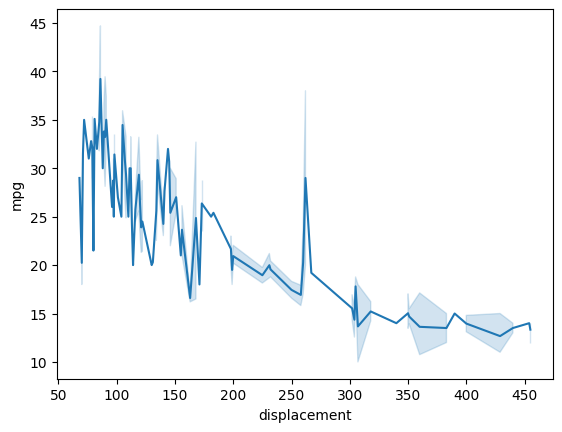

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x="displacement",y="mpg",data=mpg_data)

<Axes: xlabel='horsepower', ylabel='mpg'>

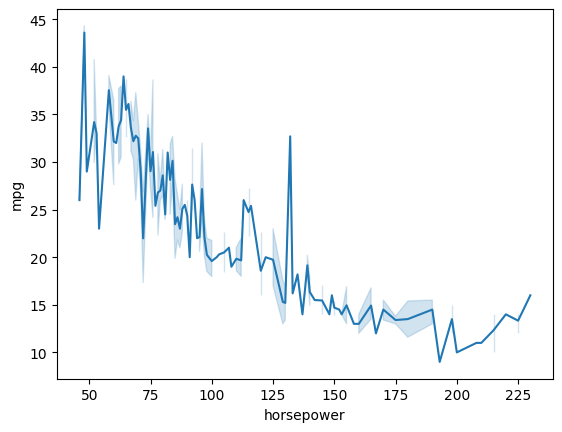

In [13]:
sns.lineplot(x="horsepower",y="mpg",data=mpg_data)

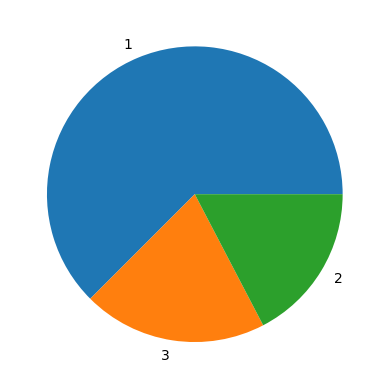

In [15]:
plt.pie(mpg_data["origin"].value_counts(),labels=mpg_data["origin"].value_counts().index)
plt.show()

<Axes: xlabel='displacement', ylabel='mpg'>

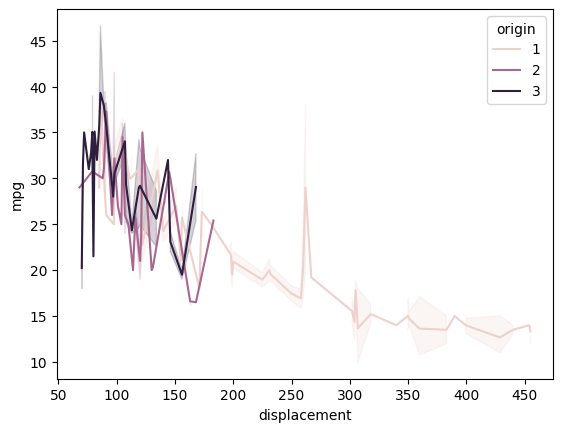

In [18]:
sns.lineplot(x="displacement",y="mpg",data=mpg_data, hue="origin")